In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [203]:
data = pd.read_csv("inequality_output.csv")
data.head()

,Step,AgentID,Wealth,Innovation,Pay
0,1,1,10.0,1.05,0.21
1,1,2,10.0,1.05,0.21
2,1,3,10.0,1.05,0.22
3,1,4,10.0,1.04,0.21
4,1,5,10.0,1.05,0.24


In [204]:
data["AgentID"]

0          1
1          2
2          3
3          4
4          5
        ... 
19995    196
19996    197
19997    198
19998    199
19999    200
Name: AgentID, Length: 20000, dtype: int64

In [205]:
final = data[data["Step"]==100]
final = list(final["Wealth"])


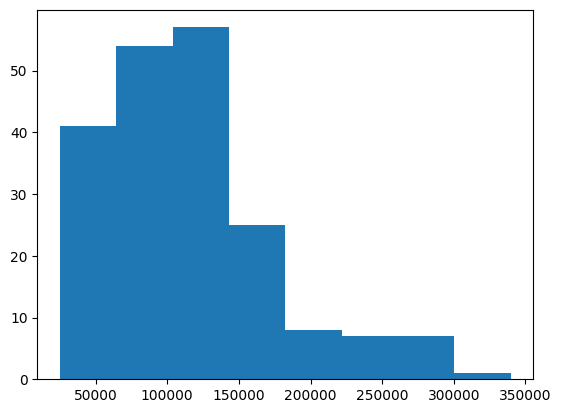

In [206]:
#uses sturges rule of bin creation
plt.hist(final, bins = int(np.log2(200) + 1))
None

In [207]:
min(final), max(final), sum(final)

(25121.438787622646, 339744.4818168194, 22793950.322967034)

In [208]:
X= list(range(1, 201))
y = sorted(final)

In [209]:
len(y), len(X)

(200, 200)

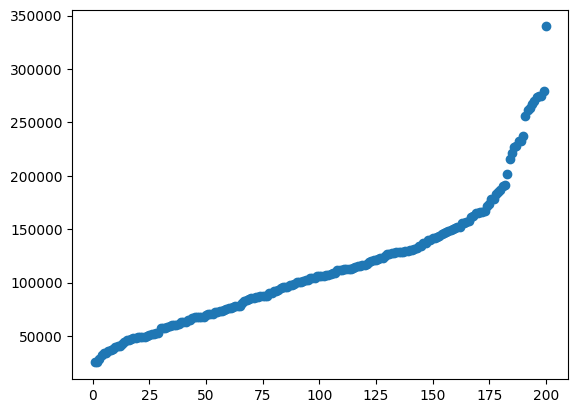

In [210]:
plt.scatter(X,y)

In [215]:
# Filter the DataFrame to include only rows where Step is 100
step_100_df = data.loc[data['Step'] == 100]

# Find the row with the minimum Wealth at Step 100
min_wealth_row = step_100_df.loc[step_100_df['Wealth'].idxmin()]
min_wealth_row

Step            100.000000
AgentID         131.000000
Wealth        25121.438788
Innovation        1.060000
Pay               0.120000
Name: 19930, dtype: float64

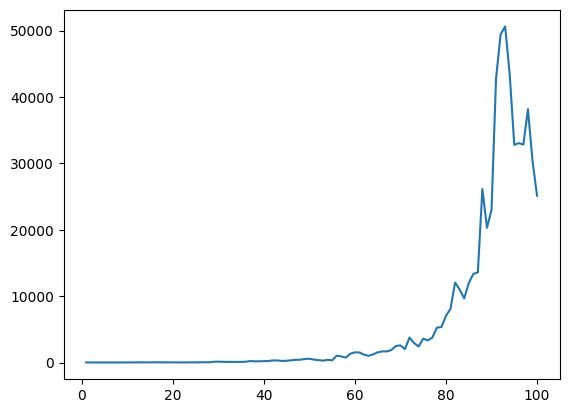

In [217]:
oneagent = data.loc[data['AgentID'] == 131]


# Plot the wealth of agent 14 over time
g = plt.plot(oneagent["Step"], oneagent["Wealth"])

In [214]:
oneagent["Wealth"]

156          10.000000
356          14.818170
556          16.550053
756          14.708859
956          14.357150
             ...      
19156    183805.859850
19356    206852.627045
19556    231432.745889
19756    319270.544906
19956    339744.481817
Name: Wealth, Length: 100, dtype: float64

In [195]:
oneagent["Innovation"].unique()

array([1.04])

In [196]:
ccdf =[]
for idx in range(len(final)): 
    if len(ccdf) == 0: 
        ccdf.append(final[idx])
    else: 
        ccdf.append(final[idx]+ccdf[-1])

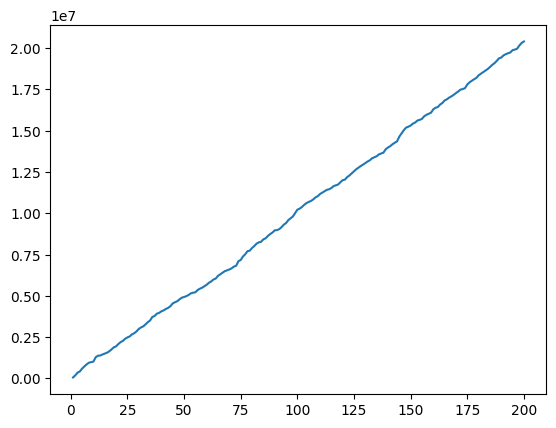

In [197]:
plt.plot(X,ccdf)


In [198]:
data2 = pd.read_csv("model_output.csv")
data2.head()

,Unnamed: 0,Gini,Total
0,0,0.000000,2000.000000
1,1,0.124389,2182.789892
2,2,0.173826,2390.476775
3,3,0.200382,2615.410208
4,4,0.212171,2867.148679


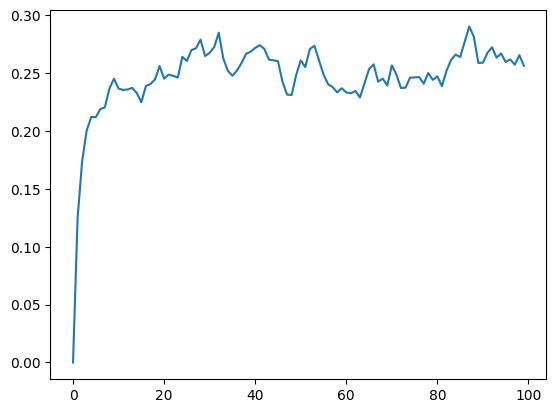

In [199]:
plt.plot(data2["Gini"])

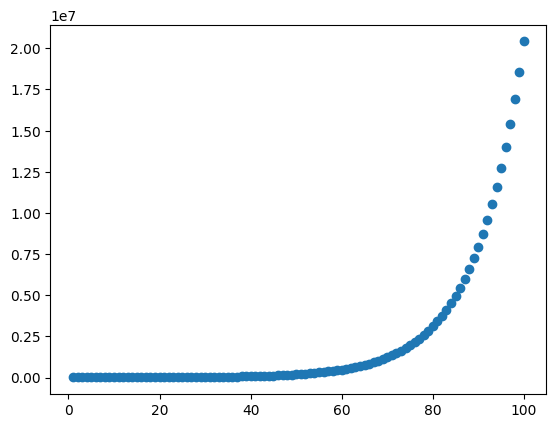

In [200]:
x = range(1,101)
plt.scatter(x,data2["Total"])

In [201]:
data2["Total"]

0     2.000000e+03
1     2.182790e+03
2     2.390477e+03
3     2.615410e+03
4     2.867149e+03
          ...     
95    1.399525e+07
96    1.538707e+07
97    1.689809e+07
98    1.857958e+07
99    2.040761e+07
Name: Total, Length: 100, dtype: float64

(array([ 4.,  4., 10., 18., 50., 51., 31., 18., 10.,  4.]),
 array([1.02179719, 1.02698409, 1.03217099, 1.03735789, 1.04254478,
        1.04773168, 1.05291858, 1.05810548, 1.06329237, 1.06847927,
        1.07366617]),
 <BarContainer object of 10 artists>)

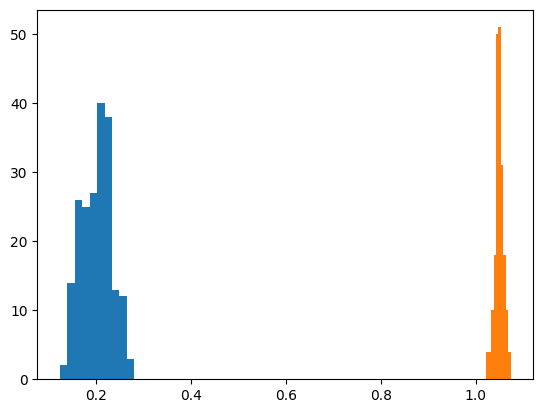

In [40]:
import numpy as np
payday_array = np.random.normal(loc=0.2,
                                          scale=0.03,
                                          size=200)
innovation_array = np.random.normal(loc=1.05,
                                          scale=0.01,
                                          size=200)
x = range(1,201)
plt.hist(payday_array)
plt.hist(innovation_array)

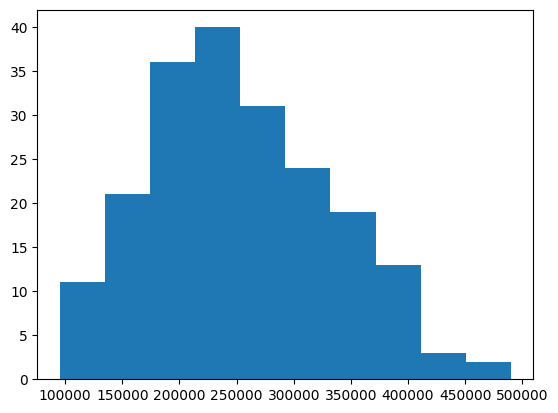

In [335]:
from matplotlib.figure import Figure

fig = Figure()
ax = fig.subplots()
# Note: you have to use Matplotlib's OOP API instead of plt.hist
# because plt.hist is not thread-safe.
ax.hist(final, bins=10)
fig